In [1]:
# https://iphyer.github.io/blog/2020/02/24/ParityPlot/
# Import libraries

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score

In [2]:
# Font for figure for publishing
font_axis_publish = {
        'color':  'black',
        'weight': 'bold',
        'size': 12,
        }
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 16

In [3]:
# Read in data
df= pd.read_csv(r"/Users/allenchoy/Downloads/chemprop-confidence-evidential/results/irap_preds_demo.csv") 
print(df)

                                                 smiles  \
0     CNC(=O)[C@H](Cc1c[nH]c(c12)c(C)ccc2)NC(=O)[C@H...   
1     CNC(=O)[C@H](Cc1c[nH]c(c12)c(C)ccc2)NC(=O)[C@H...   
2     CNC(=O)[C@H](Cc1c[nH]c(c12)c(C)ccc2)NC(=O)[C@H...   
3     CNC(=O)[C@H](Cc1c[nH]c(c12)cccc2C)NC(=O)[C@H](...   
4     CNC(=O)[C@H](Cc1c[nH]c(c12)cccc2C)NC(=O)[C@H](...   
...                                                 ...   
6245  CNC(=O)[C@@H](Cc1cc(OC)ccc1)NC(=O)[C@](C)(C1CC...   
6246  CNC(=O)[C@@H](Cc1[nH+]ccc(c12)cccc2)NC(=O)[C@@...   
6247  CNC(=O)[C@H](Cc1nccc(c12)cccc2)NC(=O)[C@@](C)(...   
6248  CNC(=O)[C@H](Cc1cc(OC)ccc1)NC(=O)[C@](C)(C1CCC...   
6249  CNC(=O)[C@]1(CC[C@@H](C(C)(C)C)CC1)NC(=O)[C@H]...   

      Tanimoto_Similarity (bb1)  true_Tanimoto_Similarity (bb1)  uncertainty  \
0                      0.325986                        0.336842     0.604940   
1                      0.325911                        0.336842     0.604258   
2                      0.326024                    

In [4]:
# Plot Figures
fignow = plt.figure(figsize=(8,8))

x = df['true_Tanimoto_Similarity (bb1)']
y = df['Tanimoto_Similarity (bb1)']

<Figure size 800x800 with 0 Axes>

Text(0, 0.5, 'Prediction')

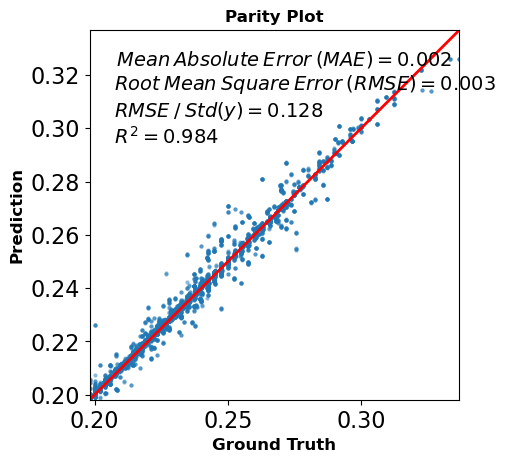

In [10]:
## find the boundaries of X and Y values
bounds = (min(x.min(), y.min()) - int(0.1 * y.min()), max(x.max(), y.max())+ int(0.1 * y.max()))

# Reset the limits
ax = plt.gca()
ax.set_xlim(bounds)
ax.set_ylim(bounds)
# Ensure the aspect ratio is square
ax.set_aspect("equal", adjustable="box")

plt.plot(x,y,"o", alpha=0.5 ,ms=3, markeredgewidth=0.0)

ax.plot([0, 1], [0, 1], "r-",lw=2 ,transform=ax.transAxes)

# Calculate Statistics of the Parity Plot 
mean_abs_err = np.mean(np.abs(x-y))
rmse = np.sqrt(np.mean((x-y)**2))
rmse_std = rmse / np.std(y)
z = np.polyfit(x,y, 1)
y_hat = np.poly1d(z)(x)

text = f"$\: \: Mean \: Absolute \: Error \: (MAE) = {mean_abs_err:0.3f}$ \n $ Root \: Mean \: Square \: Error \: (RMSE) = {rmse:0.3f}$ \n $ RMSE \: / \: Std(y) = {rmse_std :0.3f}$ \n $R^2 = {r2_score(y,y_hat):0.3f}$"

plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=14, verticalalignment='top')

plt.title("Parity Plot", fontdict=font_axis_publish)
plt.xlabel('Ground Truth', fontdict=font_axis_publish)
plt.ylabel('Prediction', fontdict=font_axis_publish)

In [8]:
# Save the figure into 300 dpi
#fignow.savefig("/Users/allenchoy/Downloads/parityplot.png",format = "png",dpi=300,bbox_inches='tight')